Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 02: Color & Basic Operators

## Introduction

This week's sheet should be solved and handed in before end of **Monday, November 25, 2023**. If you need help (and Google and other resources were not enough), use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be easy, does not give any points, and is voluntary.
There will be a similar exercise on following sheets.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

Euclidean space is used to represent n dimensional space. 
Cartesian plane is a specific instance of euclidean space in 2 dimension where every point can be identified by its x and y coordinate. Represented as R^2
Point P = (x,y)
x=x coorndinate
y =y coordinate

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

Norm of a vector in euclidean space is measure of its length and magnitude.
Ex for v1=(x1,y1) and v2=(x2,y2)
sum=(x1+x2,y1+y2)
difference=(x1-x2,y1-y2)
Euclidean distance (straight line distance between two points) can be calculated in this space. 
Other ways - Manhattan, Minkowski distance

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

Scalar product can be defined as
v1.v2 = (x1*x2,y1*y2)
It is related to angle and length as
v1.v2 = |v1||v2|cosθ
It is used in machine learning for identifying similarity

## Assignment 1: Color perception and color spaces (4 points)

### a) Human color perception

Explain how human color perception works, that is, how light of different frequencies (and mixtures of different frequencies) is perceived as different colors.
Then discuss what light sources/frequencies could be used to induce the perception of the following colors?
* orange
* brown
* purple
* white

Human color perception is based on the wavelengths of light percieved. There are three types of cones in the eye for percieving different types of wavelength (RGB). Other colors are percieved by a mix of the colors percieved by them. 

* Orange - Frequency of 590 nm
* Brown - Mixing red blue and green with low intensity for blue
* Purple - Mixing blue and red with equal intensities
* White - Mixing Red green and blue with intensity=1


### b) RGB and HSV color space

Compare the RGB and the HSV color spaces. Name advantages and discuss suitable applications for each of them.

RGB color space is a more technical model. It is based on additive mixing of three primary colors (Red, green, blue) with varying intensities to obtain other colors. 
It is used for display in digital screens 

HSV is a perception oriented model based on how humans percieve color. Dependent on hue,saturation and value.
It allows easy modifications of colors and is well suited for image editing softwares


### c) Additive and subtractive color mixing

Explain the ideas of additive and subtractive color mixing. Name examples for each mixing model and describe technical applications.

RGB color space is an example of additive color mixing. It is suitable for self luminous materials like digital screens. 
In this type of mixing the wavelengths of light are added to produce new colors. Example Red+Green=Yellow

CMYK color space is an example of subtractive color mixing. It is suitable for non-luminous materials like printers.
In this type of mixing the wavelengths of light are absorbed (usually by materials like dye) to produce new colors. Example Yellow absorbs Blue, reflects Red and Green.
Cyan + Yellow = Green
Magenta + Yellow = Red

### d) 3D color cube

Plot the colors (red, green, blue, yellow, cyan, magenta, grey, black, white) from additive and subtractive color mixing in a 3D cube. 
Plot points on the corresponding locations and give them the appropriate color. 
Hint: to create the points you can use the *ax.scatter* function, where the *c* argument can take in multiple colors.

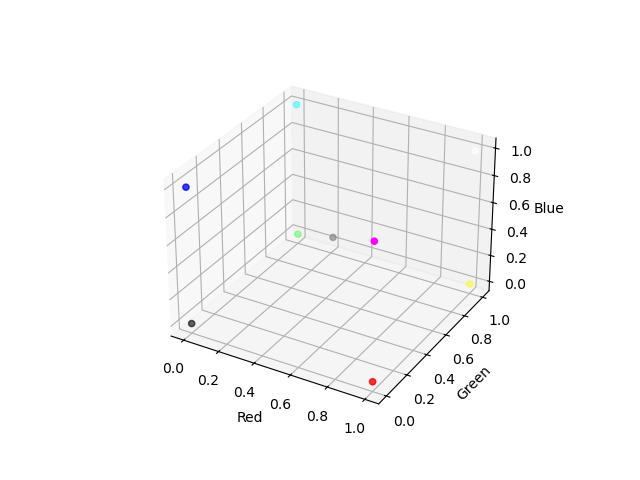

In [11]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = np.array([
    [1, 0, 0],  # Red
    [0, 1, 0],  # Green
    [0, 0, 1],  # Blue
    [0, 1, 1],  # Cyan 
    [1, 1, 0],  # Yellow
    [1, 0, 1],  # Magenta 
    [0.5, 0.5, 0.5],  # Grey
    [0, 0, 0],  # Black
    [1, 1, 1],  # White 
])

ax.scatter(colors[:, 0], colors[:, 1], colors[:, 2], c=colors) 

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

## Assignment 2: Twodimensional Convolution (8 points)

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works. Also provide the formula from the lecture and explain its idea.

Covulation is a local operator. So each pixel transformation is dependent upon its neighbors. We start by choosing a kernal or mask ( usually of size 3x3 or 5x5). We move it across the image like a rastor scan and compute the scalar product of kernal and the part of the image in consideration that is of same size as the kernal. The result is stored in the pixel at the center of the part of the image in consideration.

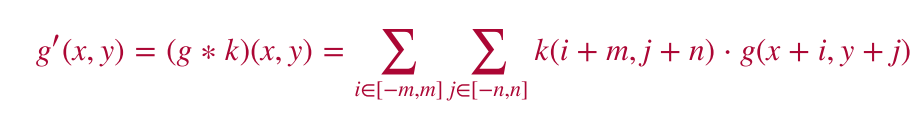

According the formula the result of applying convulation on a point x,y with a kernal k of size 2m+1x2n+1 is the summation of product of pixels in K and pixel in part of image of size same as kernal. This step is the scalar product.  

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Use formulae and proof your answers. 

Hint:

From  CV-03 slide 49: A function $f$ is linear iff 
$f \left( a \cdot x \right) = a \cdot f \left( x \right) $
and
$f \left( x_1 + x_2 \right) = f \left( x_1 \right) + f \left( x_2 \right)$

A function is homogeneous if translating the filtered image is the same as filtering the translated image. I.e. $\operatorname{translate}(g\ast k,\Delta x,\Delta y)[x,y] = (\operatorname{translate}(g,\Delta x,\Delta y)\ast k)[x,y]$


Convulation is linear.
Proof


### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

YOUR ANSWER HERE

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *c)*. This is a shorter notation.

YOUR ANSWER HERE

## Assignment 3: Applying Convolution (4 points)

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

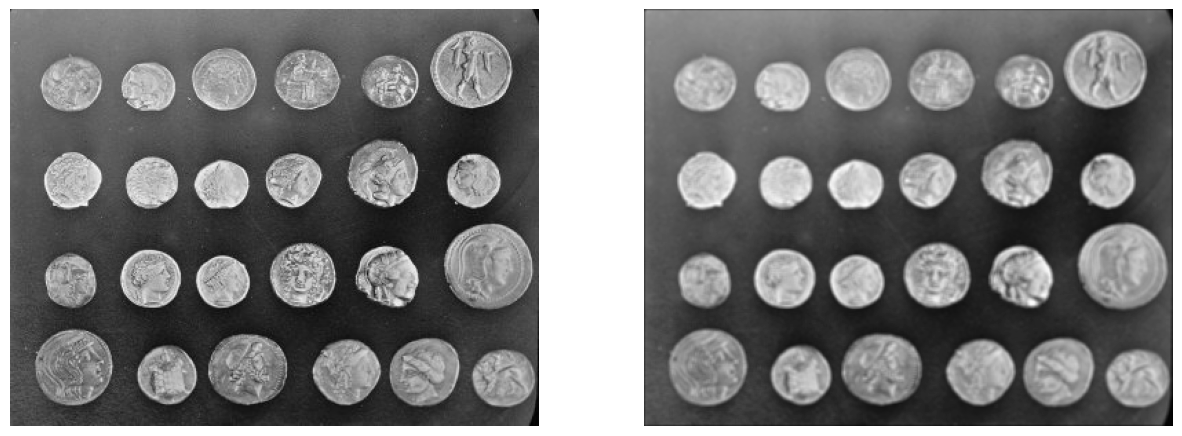

In [24]:
import numpy as np
from imageio.v2 import imread
from skimage import data,color
from scipy.ndimage import convolve

image = data.coins().astype(np.float32)
k=np.ones((3,3))/9
filtered_image = convolve(image ,k,mode='constant', cval=0.0)


fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

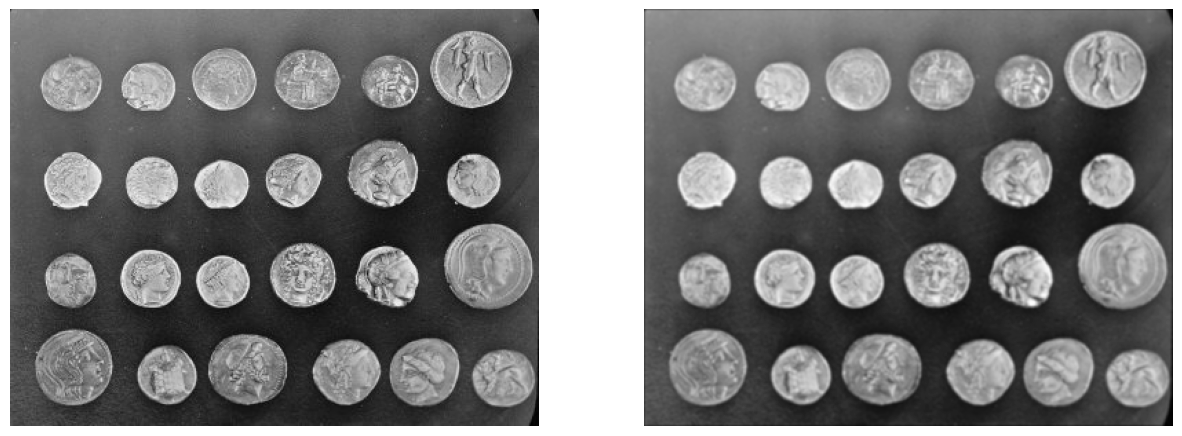

In [25]:
image = data.coins().astype(np.float32)

k=np.array([[1,2,1],[2,4,2],[1,2,1]])/16
filtered_image = convolve(image ,k,mode='constant', cval=0.0)
fig = plt.figure(figsize=(15,7))

a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

<Figure size 1500x700 with 0 Axes>

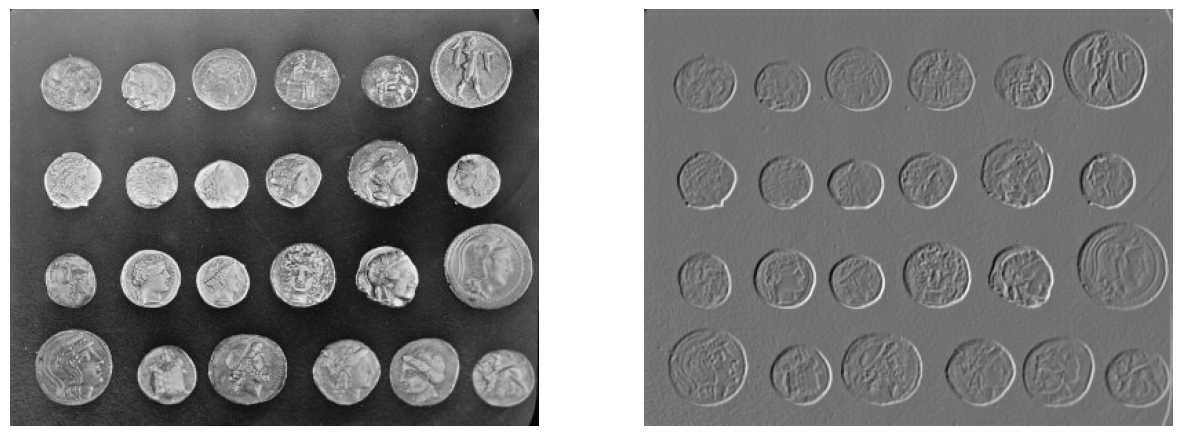

In [29]:


def normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

image = data.coins().astype(np.float32)

k_x = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])

k_y = np.array([[-1, -2, -1],
                [ 0,  0,  0],
                [ 1,  2,  1]])

k_d1 = np.array([[-2, -1,  0],
                 [-1,  0,  1],
                 [ 0,  1,  2]])

k_d2 = np.array([[ 0,  1,  2],
                 [-1,  0,  1],
                 [-2, -1,  0]])

grad_x = normalize(convolve(image, k_x) )
grad_y = normalize(convolve(image, k_y)  )
grad_d1 = normalize(convolve(image, k_d1) )
grad_d2 = normalize(convolve(image, k_d2)  )

filtered_image = np.sqrt(grad_x**2 + grad_y**2+grad_d1**2 + grad_d2**2)
fig = plt.figure(figsize=(15,7))

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()



### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


* The blurred image lacks details on edges, when it is subtracted from the original image we get edges. We multiply the edges by a fixed amount to enhance it and add it back to original image making it sharp
* In normalizing, the data is readjusted to change the range of values. All the values are changes relative to each other.
 In clipping, the data is prevented from going beyond a certain threshold value

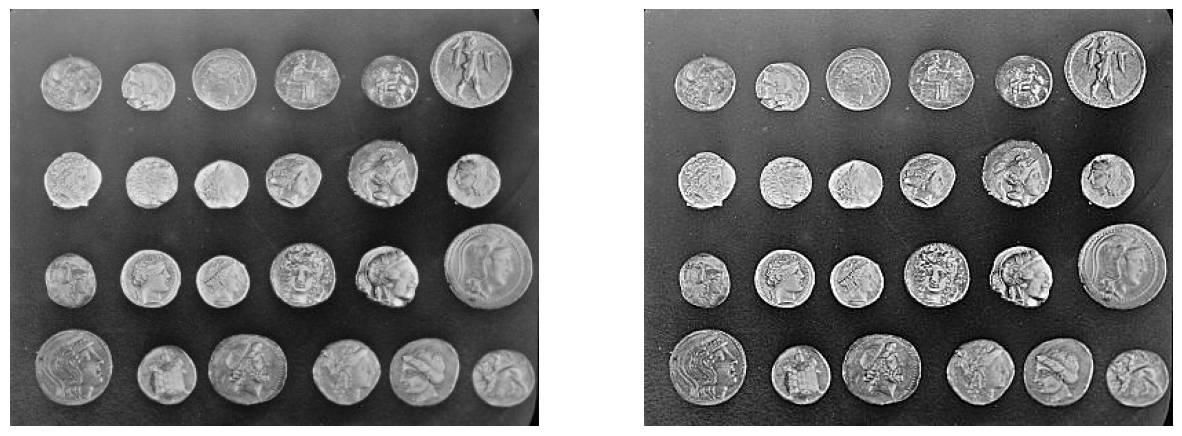

In [32]:
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

unsharped_mask_image = convolve(image, gauss_5)
sharped_image = np.clip(image+(image-unsharped_mask_image)*amount,0,255)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(sharped_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 4: Implementing Convolution (4 points)

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel as arguments and return an image of the same size, containing the result of convolving the image with the kernel.

**(a)** First: you may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them in (b).

When considering the pixels at the boundary, they do not have sufficient neighbours on all the 4 sides which is required while calculatin scalar product. Possible solutions - 
* Ignore the boundaries - this leads to loss of information
* Add padding - 0 or constant gray values can be padded on all the sides 

**(b)** Now implement your function. Apply it with different kernels and compare the results with the output of the library function `scipy.ndimage.correlate` (bonus question: why not `scipy.ndimage.convolve`?).

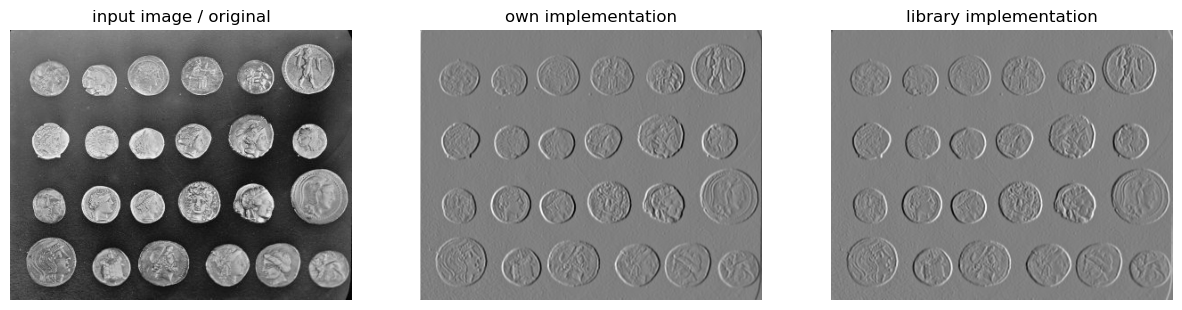

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import scipy.ndimage

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    
    #add padding
    padded_img = np.pad(img,((mh,mh),(nh,nh)))
#     kern = np.flipud(np.fliplr(kern))
    
    for i in range(M):
        for j in range(N):
            region = padded_img[i:i+m,j:j+n]
            result[i][j] = np.sum(region*kern)

    return result

# Apply your function to an image:
image = iio.imread("imageio:coins.png").astype(np.float32)

# Try different filters (kernels)
kernel = 1/4 * np.asarray([[1,0,-1],[2,0,-2],[1,0,-1]])

fig = plt.figure(figsize=(15,7))
fig.add_subplot(1,3,1)
plt.title("input image / original")
plt.imshow(image, cmap = 'gray')
plt.axis('off')
fig.add_subplot(1,3,2)
plt.title("own implementation")
plt.imshow(my_convolve2d(image, kernel), cmap = 'gray')
plt.axis('off')
fig.add_subplot(1,3,3)
plt.title("library implementation")
plt.imshow(scipy.ndimage.correlate(image, kernel), cmap = 'gray')
plt.axis('off')
plt.show()